# Stock Price Project

## Goal:
- To create a ML model to aid in prediction of stocks
- Use the model on 4 tech stocks selected
- Have the model predict out for a year

In [1]:
import pandas as pd
import new_lib as nl
import wrangle as w
import acquire as a
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import functions as f

## Acquire / Prepare / Wrangle

- Data acquired from polygon.io using an API
- Data includes 4 stocks(Amazon, Apple, Google, and Netflix)
- Preparing the data by creating a datetime index for each day the stock market is open
- Using closing prices as the target indicator

In [2]:
amzn_df = a.get_data('amzn')
appl_df = a.get_data('appl')
nflx_df = a.get_data('nflx')
googl_df = a.get_data('googl')
# Acquiring data

In [3]:
amzn_df = w.wrangle_data('amzn')
appl_df = w.wrangle_data('appl')
nflx_df = w.wrangle_data('nflx')
googl_df = w.wrangle_data('googl')
# wrangling data

## Explore
- First create a baseline using a naive model taking the average value of the train portion of the data
- Then after numerous tests and attempts at models creating a ML model to predict stock price for both test and 1 year further

### Splitting the data

In [4]:
am_train, am_val, am_test = w.split_data(amzn_df)
ap_train, ap_val, ap_test = w.split_data(appl_df)
nflx_train, nflx_val, nflx_test = w.split_data(nflx_df)
googl_train, googl_val, googl_test = w.split_data(googl_df)
# Splitting data

### Grabbing a first look at the entire dataset to see what the stocks look like

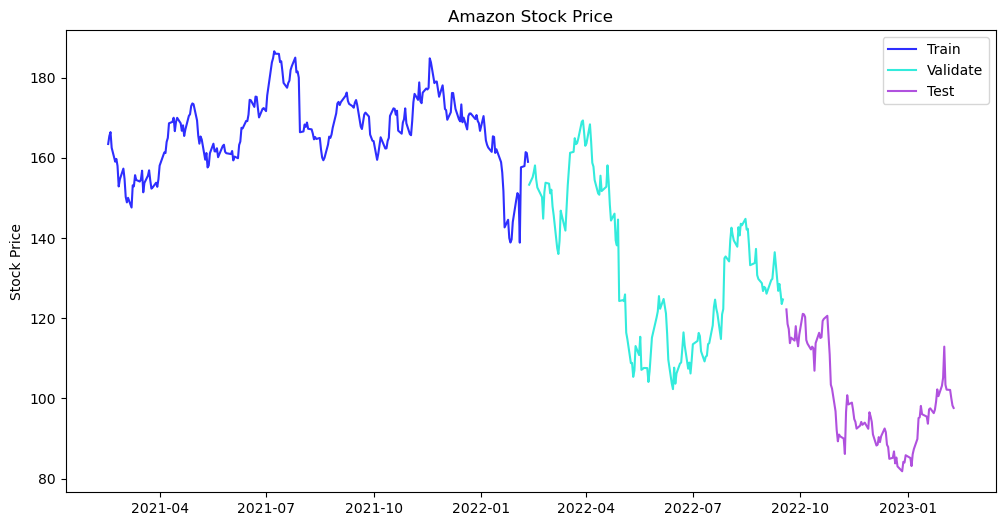

In [5]:
f.first_look(am_train, am_val, am_test, 'Amazon')

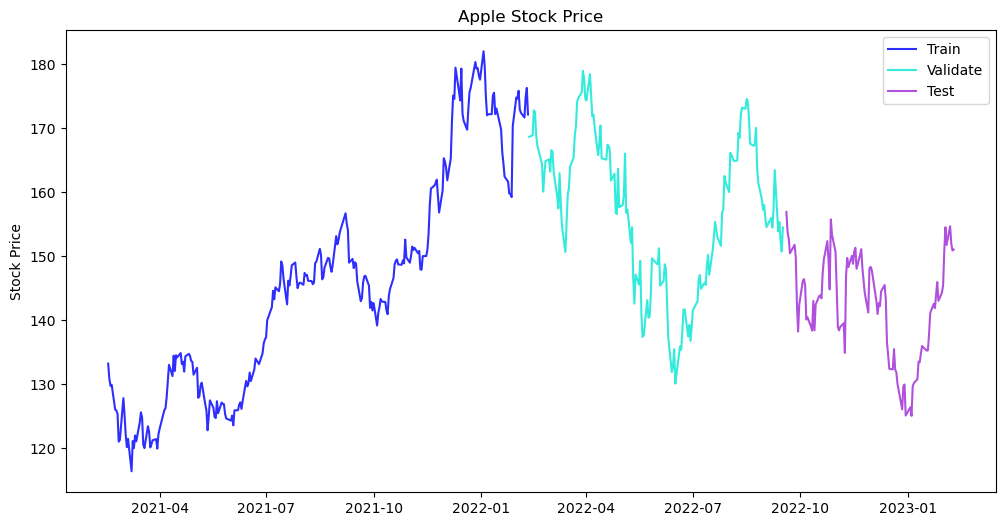

In [6]:
f.first_look(ap_train, ap_val, ap_test, 'Apple')

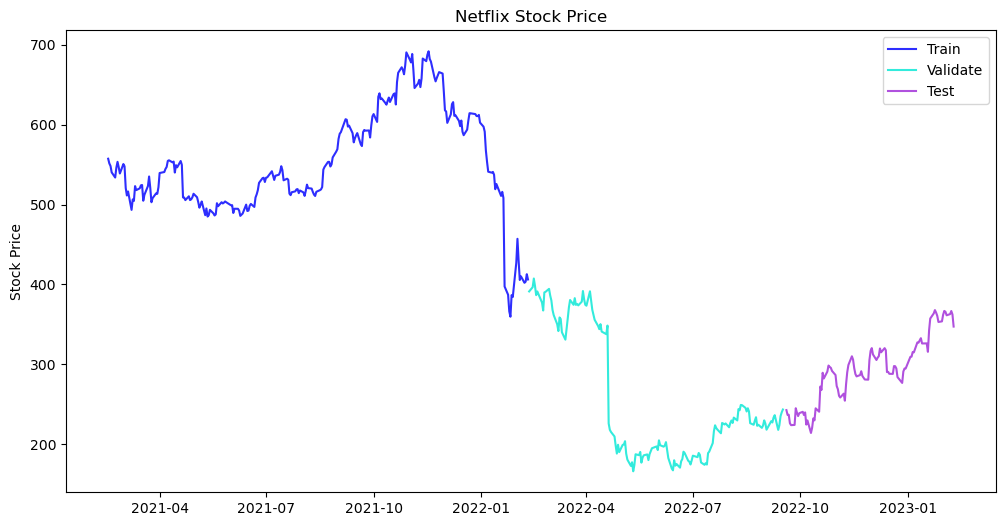

In [7]:
f.first_look(nflx_train, nflx_val, nflx_test, 'Netflix')

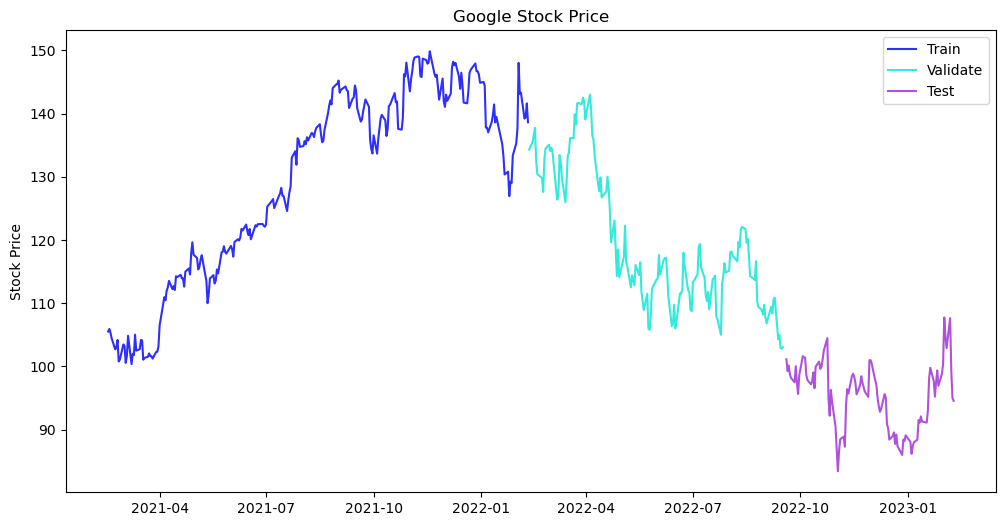

In [8]:
f.first_look(googl_train, googl_val, googl_test, 'Google')

#### They all seem to have taken a dip in early 2022 with Netflix taking a drastic nosedive before somewhat recovering

## Running Seasonal Decompositions to better see trends

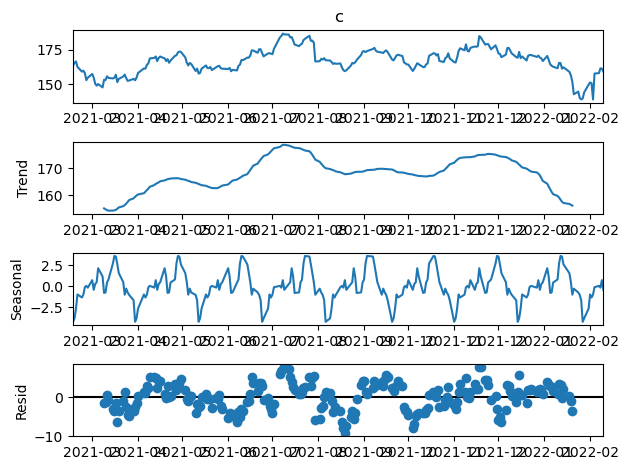

In [10]:
f.seasonal_decomp(am_train)

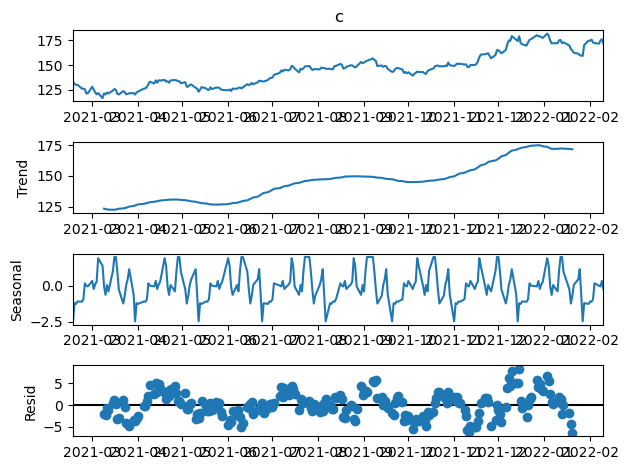

In [11]:
f.seasonal_decomp(ap_train)

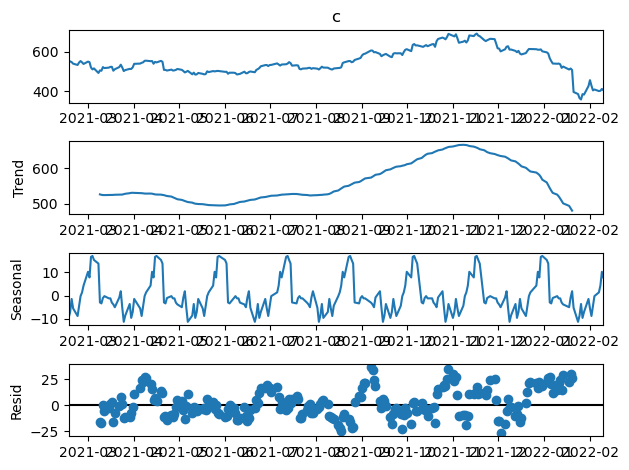

In [12]:
f.seasonal_decomp(nflx_train)

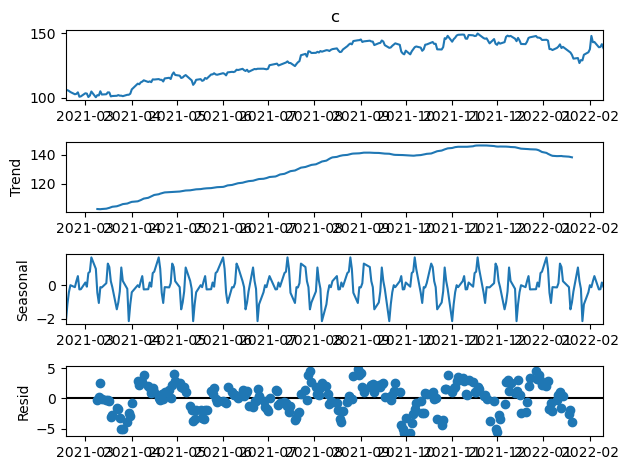

In [13]:
f.seasonal_decomp(googl_train)

### There are clear trend lines when the noise is removed however they are not consistent with each other indicating that the stocks might not be so clearly linked despite being in the same category(tech)

## Exploration Summary

- Trend Lines exist in the data
- The lines don't seem to have any relation to other stocks
- The stocks all took a hit in the last year most likely due to the pandemic which will affect the model
- Based on Exploration an ARIMA model seemed the best to use

## Modeling

### Creating baselines using the naive model to grab a sample RMSE and visual for performance

Amazon -- RMSE: 42


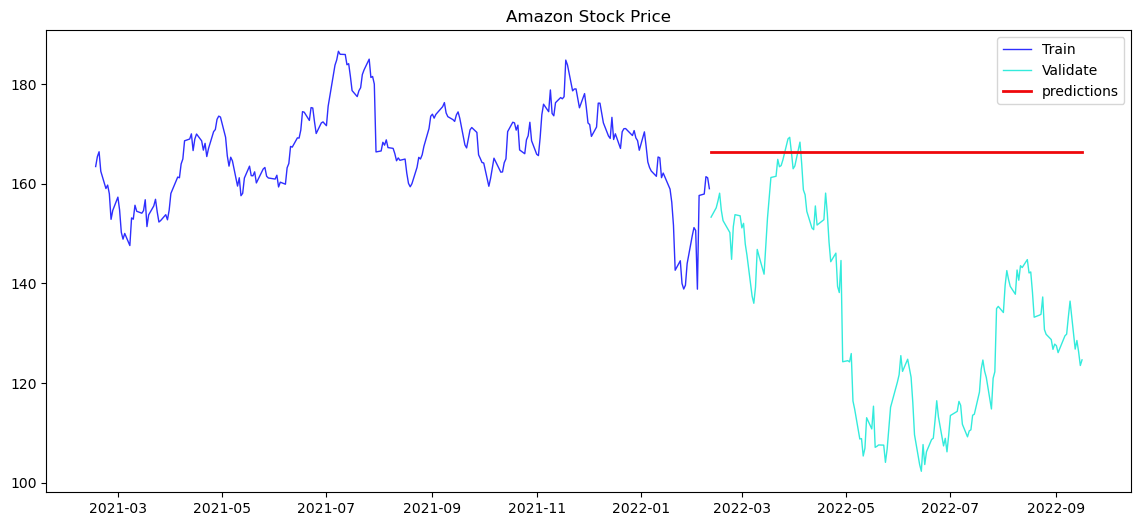

In [14]:
f.baseline(am_train, am_val, 'Amazon')

Apple -- RMSE: 16


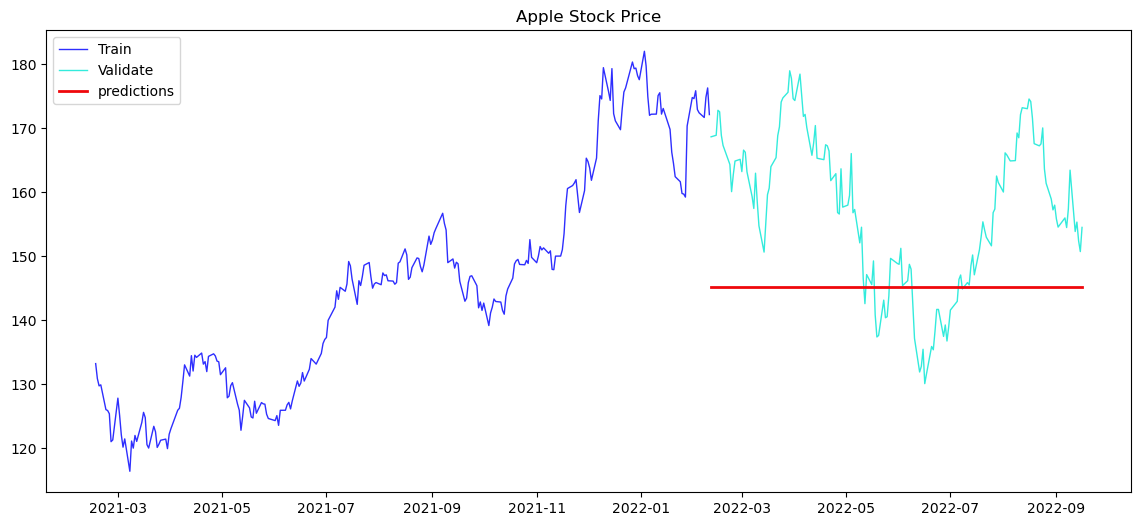

In [15]:
f.baseline(ap_train, ap_val, 'Apple')

Netflix -- RMSE: 329


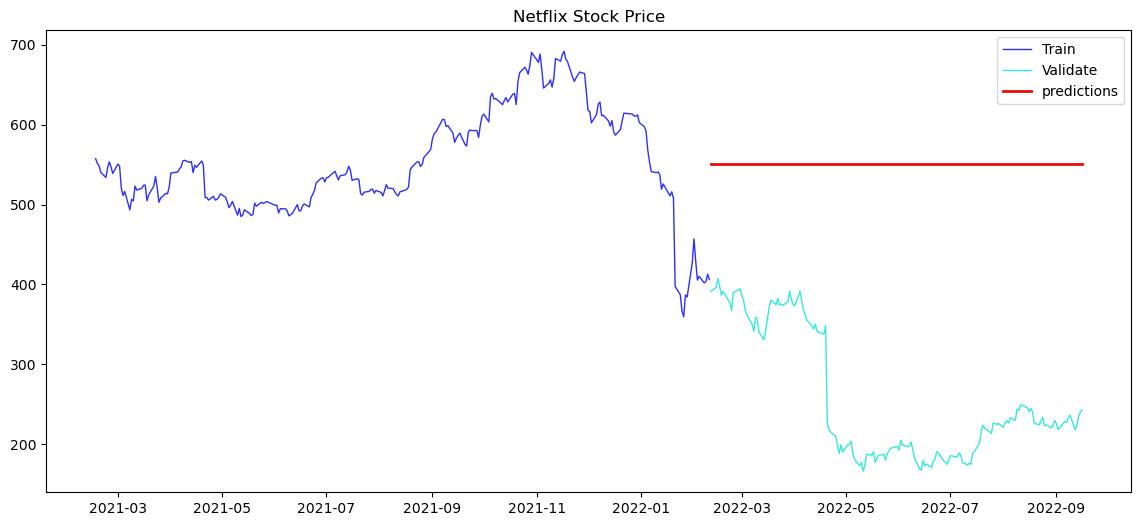

In [16]:
f.baseline(nflx_train, nflx_val, 'Netflix')

Google -- RMSE: 16


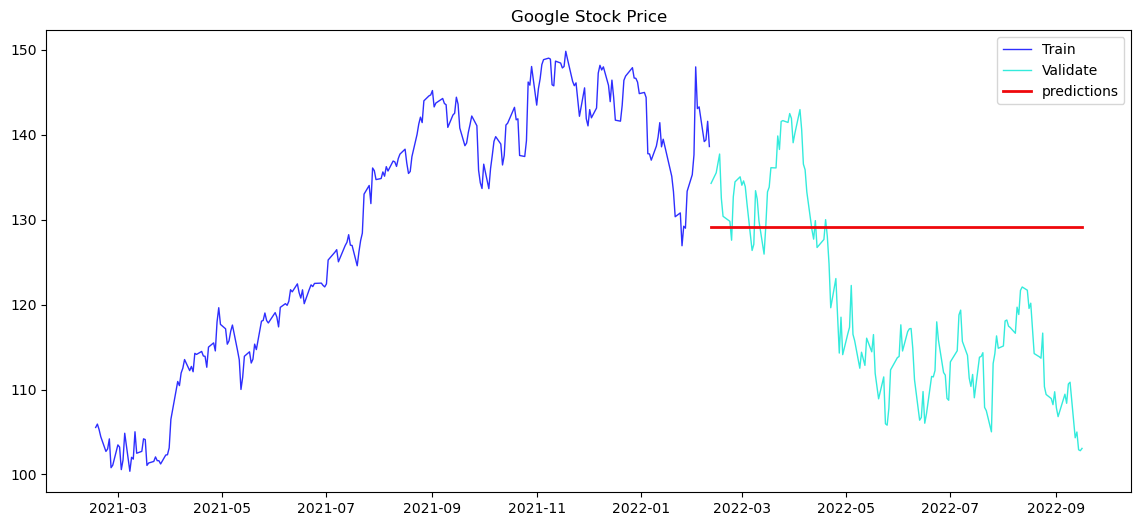

In [17]:
f.baseline(googl_train, googl_val, 'Google')

### Apple and Google stock has the best baseline which could indicate a lower volatility
### However the baseline is not very accurate for any of the stocks

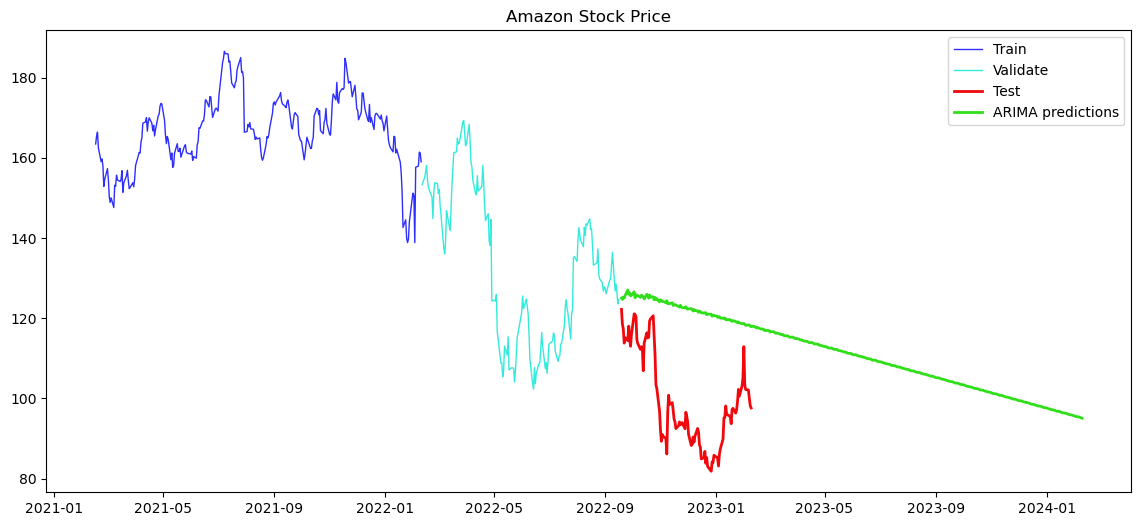

In [18]:
f.arima(amzn_df, am_train, am_val, am_test, 'Amazon')

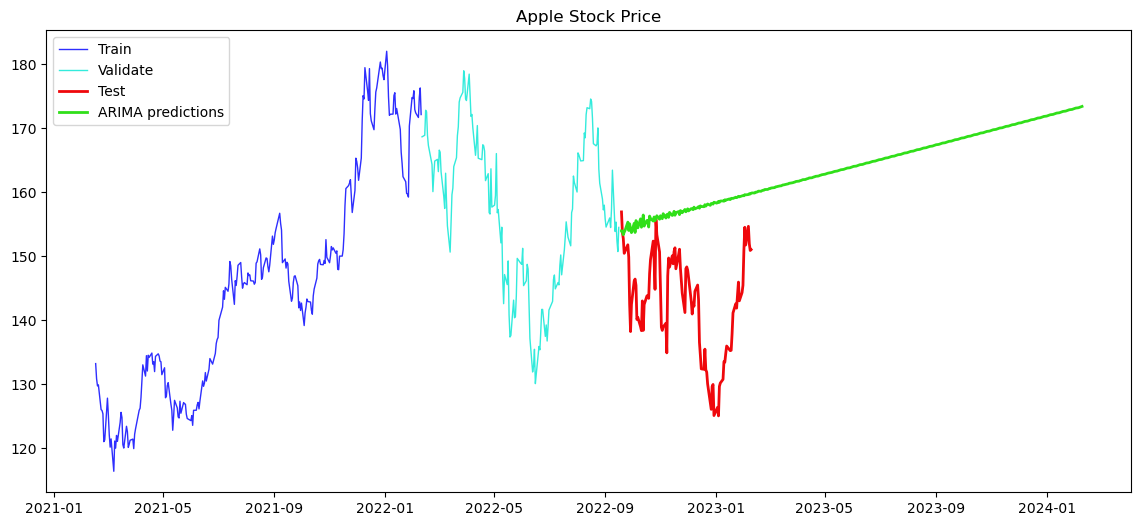

In [19]:
f.arima(appl_df, ap_train, ap_val, ap_test, 'Apple')

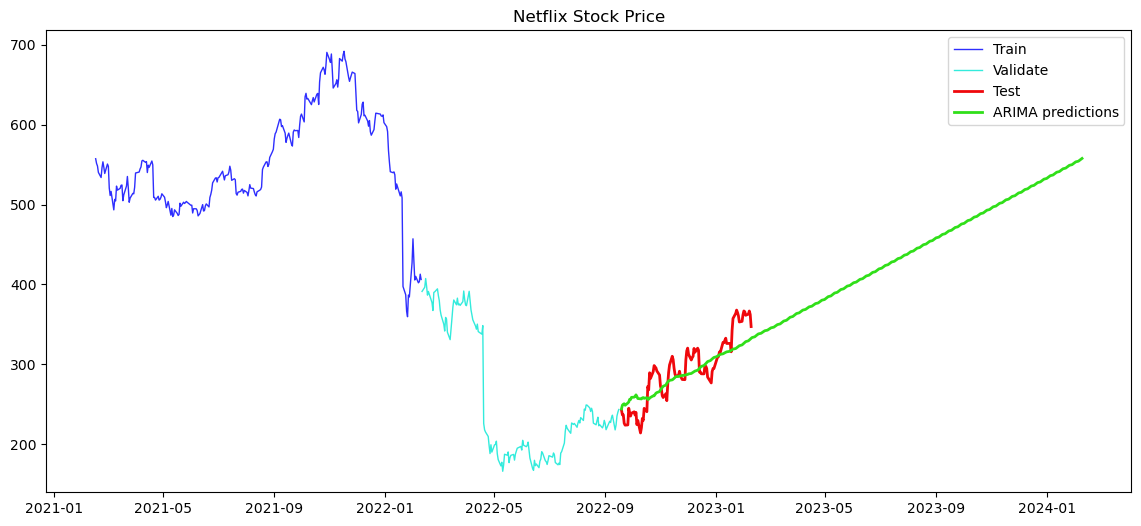

In [20]:
f.arima(nflx_df, nflx_train, nflx_val, nflx_test, 'Netflix')

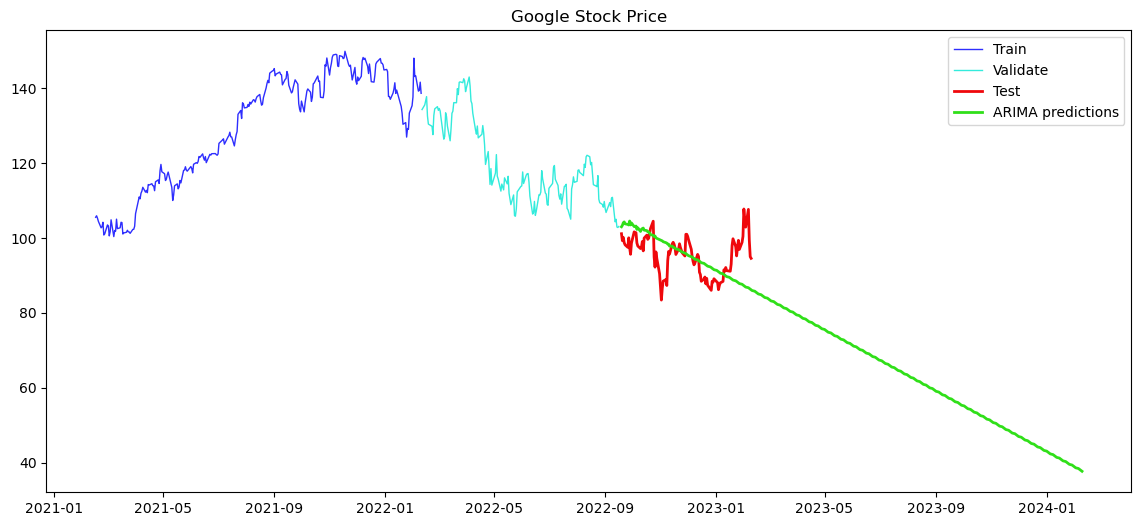

In [21]:
f.arima(googl_df, googl_train, googl_val, googl_test, 'Google')

## Modeling Summary

- The model performed the best on Netflix stock by a large margin
- It is likely that a deeper dive in the ARIMA hyperparameters is necessary to finetune the model for better results
- Had to resplit data to give ARIMA a better performance
- These models do not appear very useful

## Conclusions

- There simply was not enough data available to create a model that could with any certainty determine an accurate trend of the price
- The pandemic was most likely a big factor in the volatility of the stocks
- A more refined ARIMA would likely produce better results
- While this model in its current state is not valuable it could be refined in the future

## Next Steps

- Get a more detailed understanding of the ARIMA model and revist the project
- Consider paying for more data or finding a better API